formation start	2018-01-01	formation end	2019-01-01
transaction start	2019-01-01	transaction end	2019-07-01
RESULTS will be saved at rev_result_0207//2019-01-01_1Y_2019-01-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.10it/s]



run cost time 42.649465799331665 s

formation start	2018-07-01	formation end	2019-07-01
transaction start	2019-07-01	transaction end	2020-01-01
RESULTS will be saved at rev_result_0207//2019-07-01_1Y_2019-07-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.11it/s]



run cost time 39.761733055114746 s

formation start	2019-01-01	formation end	2020-01-01
transaction start	2020-01-01	transaction end	2020-07-01
RESULTS will be saved at rev_result_0207//2020-01-01_1Y_2020-01-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.14it/s]



run cost time 42.238115549087524 s

formation start	2019-07-01	formation end	2020-07-01
transaction start	2020-07-01	transaction end	2021-01-01
RESULTS will be saved at rev_result_0207//2020-07-01_1Y_2020-07-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.25it/s]



run cost time 49.502679109573364 s

formation start	2020-01-01	formation end	2021-01-01
transaction start	2021-01-01	transaction end	2021-07-01
RESULTS will be saved at rev_result_0207//2021-01-01_1Y_2021-01-01_6M/


100%|██████████| 20/20 [00:05<00:00,  3.97it/s]



run cost time 54.89531230926514 s

formation start	2020-07-01	formation end	2021-07-01
transaction start	2021-07-01	transaction end	2022-01-01
RESULTS will be saved at rev_result_0207//2021-07-01_1Y_2021-07-01_6M/


100%|██████████| 20/20 [00:05<00:00,  3.84it/s]



run cost time 65.00935196876526 s

formation start	2021-01-01	formation end	2022-01-01
transaction start	2022-01-01	transaction end	2022-07-01
RESULTS will be saved at rev_result_0207//2022-01-01_1Y_2022-01-01_6M/


100%|██████████| 20/20 [00:04<00:00,  4.15it/s]



run cost time 67.624267578125 s



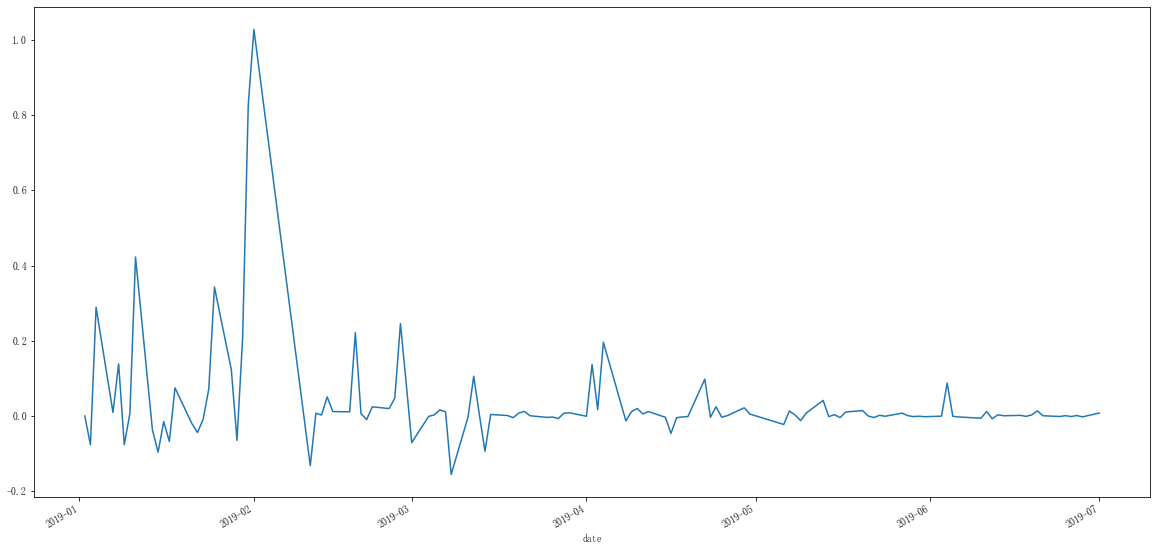

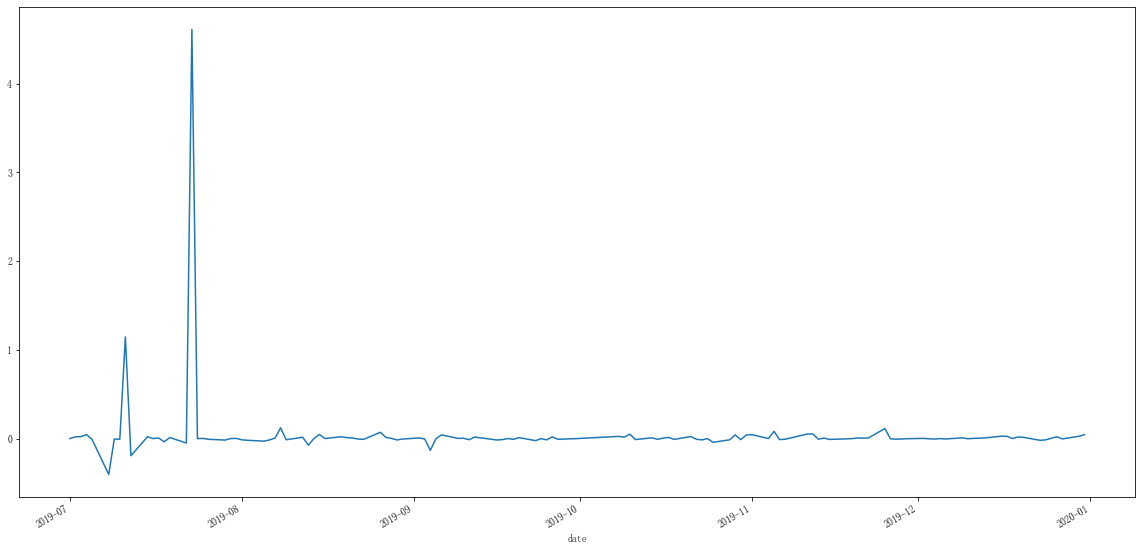

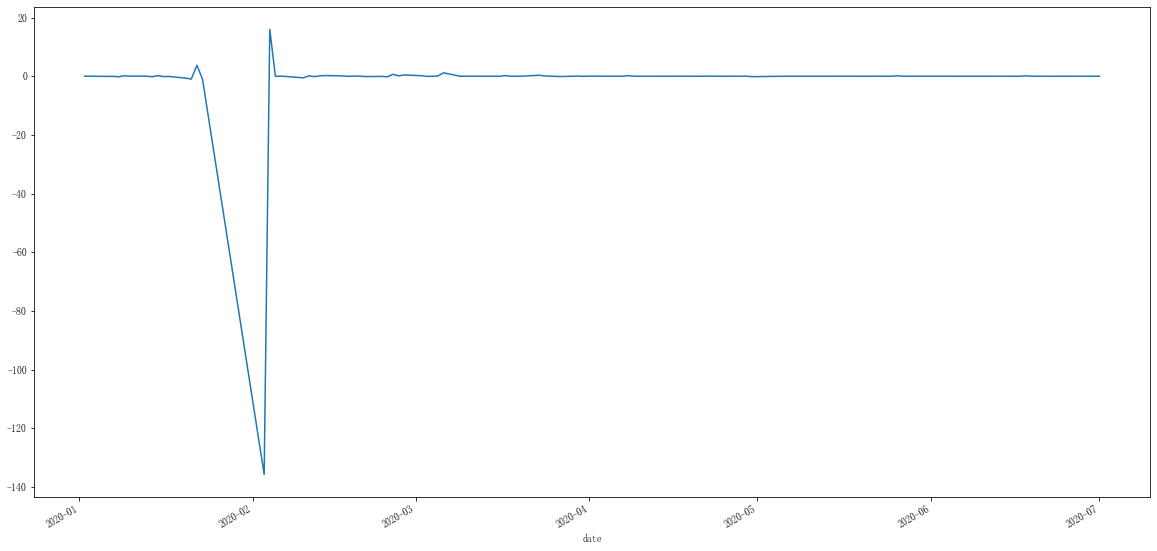

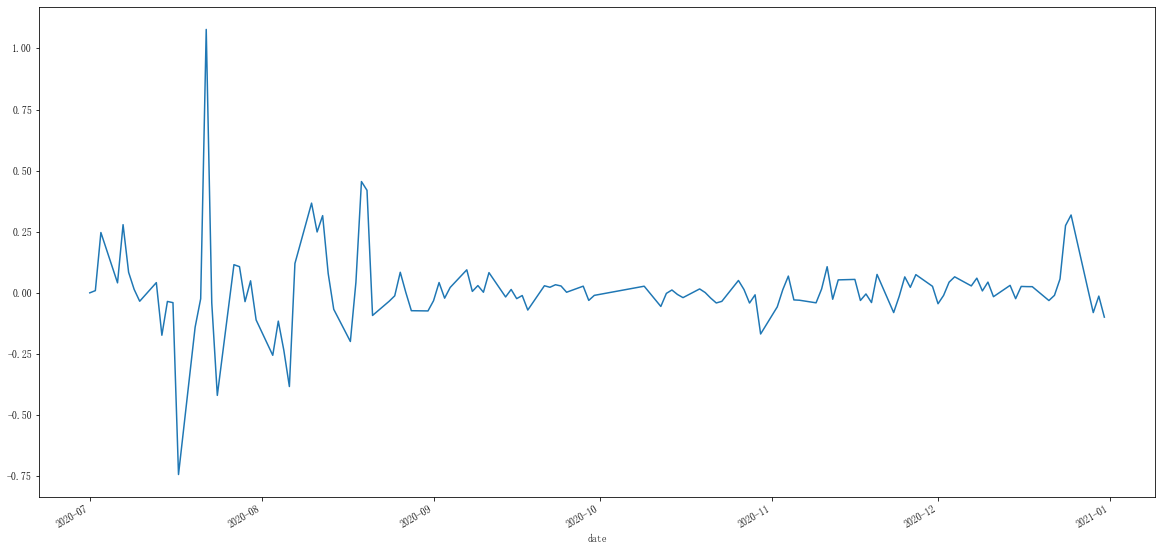

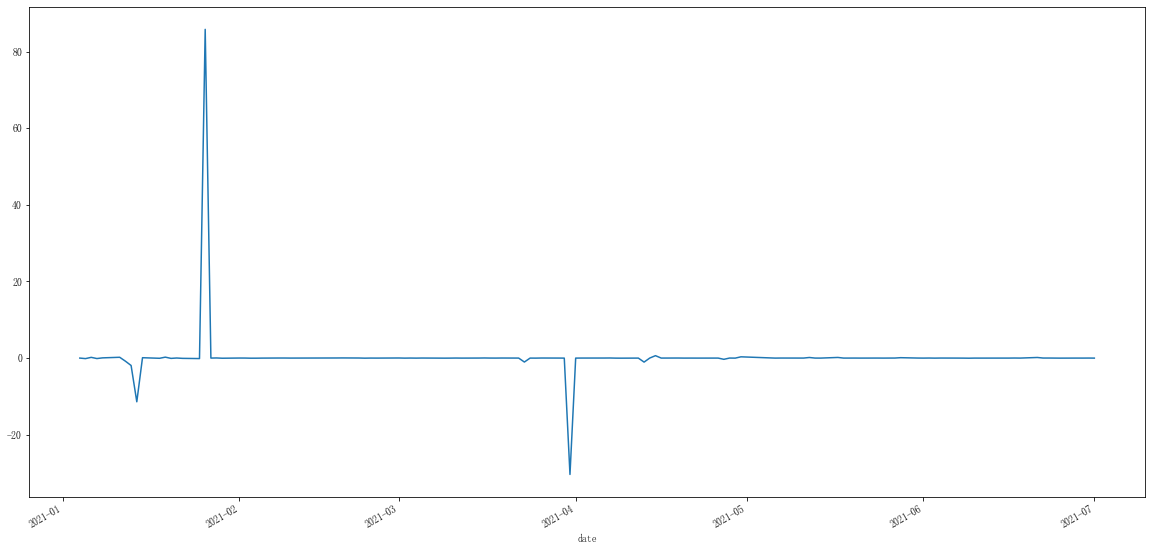

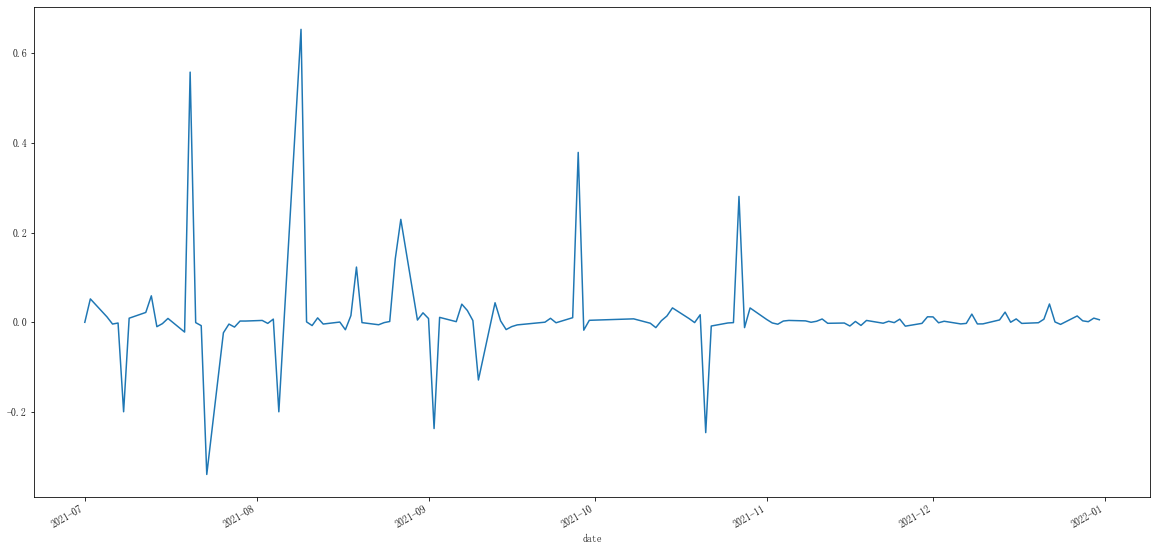

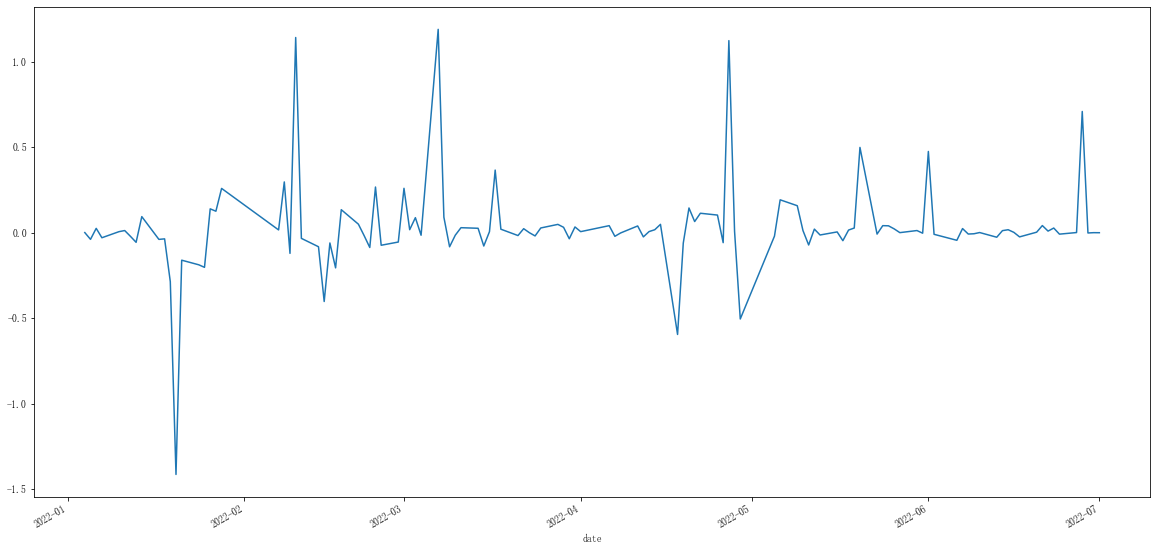

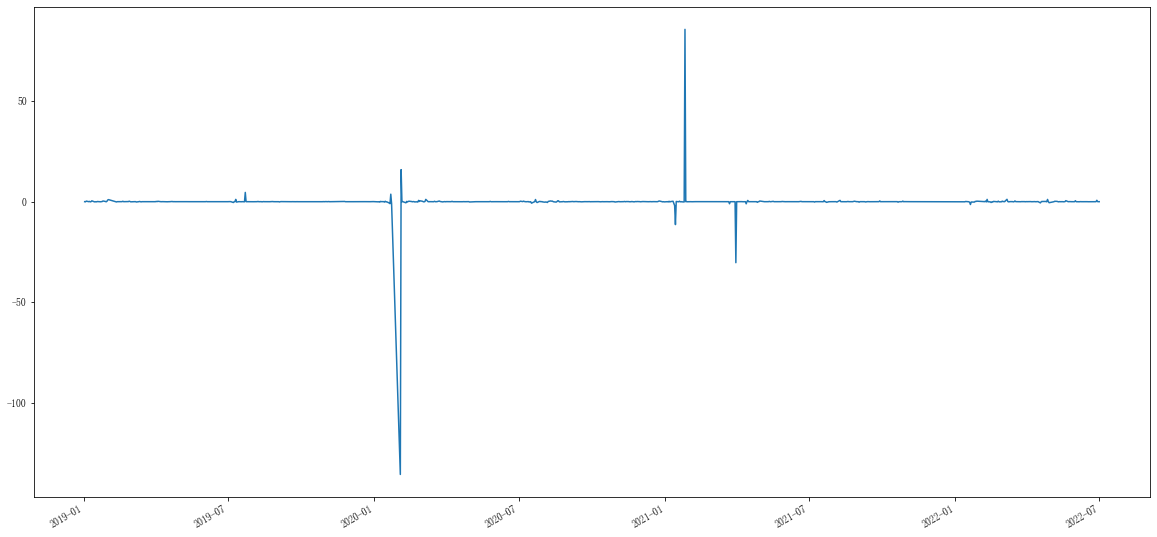

In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2023/1/31 14:14

@author: Susan
TODO:
 0. 风险限额
 2. 截面or均值数据的选取怎么思考, 距离向量为什么可以看成类似方差, 其阈值的选取
 3. 有了净值曲线后各种指标的计算，有没有现成的代码
"""
import pandas as pd

from pt_utils.PairTrading import PairTrading

import matplotlib.pyplot as plt

trans_start = '2019-01-01'
end_date = '2022-01-01'
out_folder = 'rev_result_0207/'

col = ['cash', 'value', 'rev']
flow_table = pd.DataFrame(columns=col)

pair_num = 20
invest_amount = 2e6
invest_num = invest_amount / pair_num

while trans_start <= end_date:
    pt = PairTrading(trans_start, trans_start, out_folder, c=0.0015, c_ratio=0.0015, pair_num=pair_num, norm_bar=0.007)
    flow_df = pt.run(invest_num)
    flow_table = pd.concat([flow_table, flow_df[col]])
    trans_start = pt.trans_end
PairTrading.clear_object_data()
flow_table.to_csv(out_folder + '收益率交易收益汇总.csv')
plt.figure(figsize=(20, 10))
flow_table['rev'].plot()
plt.savefig(out_folder + f'收益率_{trans_start}_{end_date}.png')
plt.show()